# Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


# Aim
You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

# Importing essential libraries

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading csv file

In [128]:
fore_cast_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

In [129]:
fore_cast_data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


# Gives informaton of the dataset it's type etc

In [130]:
fore_cast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


# Checking null values

In [131]:
fore_cast_data.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

# Obtaining the dimensions of dataset

In [132]:
fore_cast_data.shape

(7752, 25)

# Columns

In [133]:
fore_cast_data.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

# Filling Missing Values

In [134]:
fore_cast_data['station'].iloc[7750]=1.0
fore_cast_data['station'].iloc[7751]=2.0

In [135]:
fore_cast_data['Date'].iloc[7750]='31-08-2017'
fore_cast_data['Date'].iloc[7751]='31-08-2017'

In [136]:
for i in fore_cast_data:
    if i not in ['station', 'Date','lat', 'lon']:
        fore_cast_data[i]=fore_cast_data[i].replace(np.nan,fore_cast_data[i].median())
        

In [137]:
fore_cast_data.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [36]:
fore_cast_data.shape


(7752, 28)

# Spliting date

splitting date is essential here so thet we may get separate columns of day,month and year and may use it as per our convinience and to visualise data properly without any type error

In [138]:
# Converting Date datatypes and spliting date into date, month and year.
fore_cast_data['Date']=pd.to_datetime(fore_cast_data['Date'])
fore_cast_data['Day']=fore_cast_data['Date'].apply(lambda x:x.day)
fore_cast_data['Month']=fore_cast_data['Date'].apply(lambda x:x.month)
fore_cast_data['Year']=fore_cast_data['Date'].apply(lambda x:x.year)
fore_cast_data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013


In [139]:
fore_cast_data_fin =fore_cast_data.drop('Date',axis= 1)

# Checking outliers

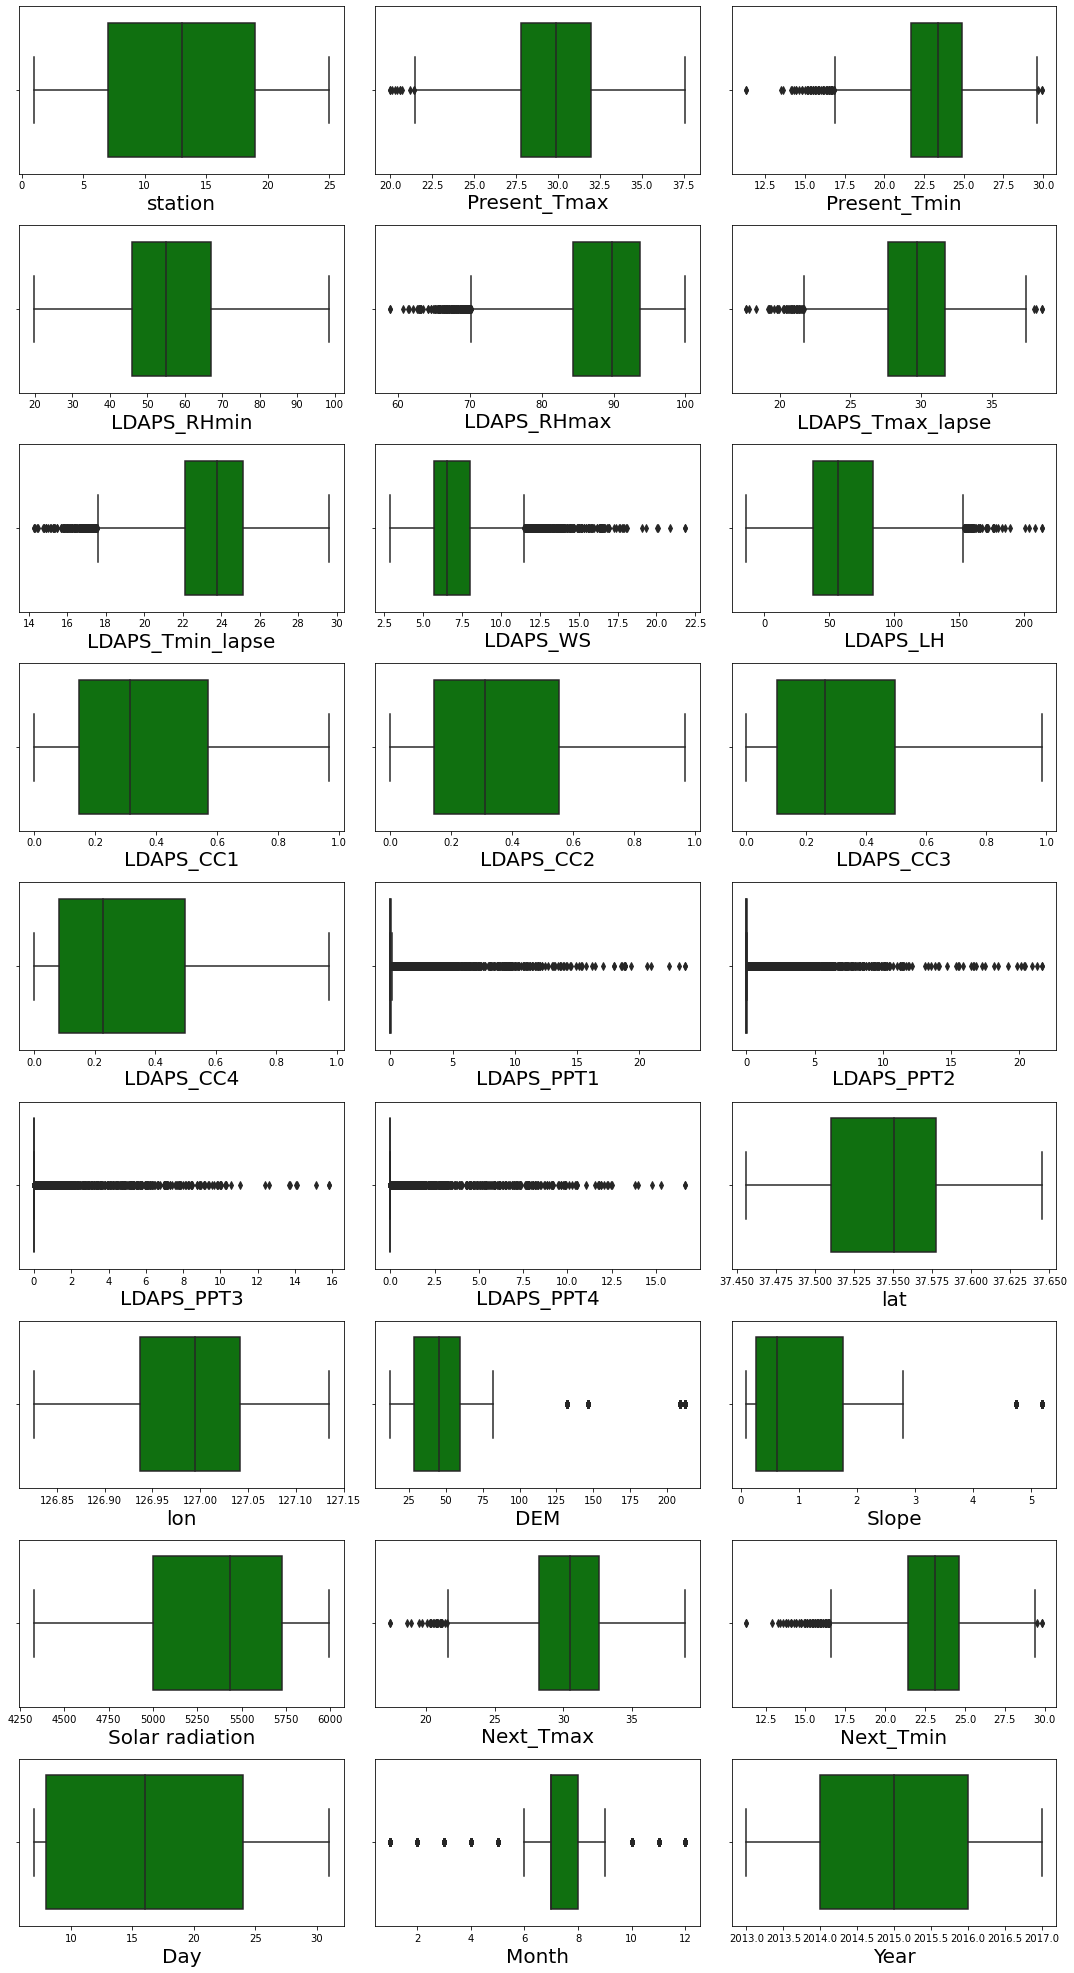

In [140]:
plt.figure(figsize=(15,30),facecolor='white')
plotnumber=1

for column in fore_cast_data_fin:
    if plotnumber<=29:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(fore_cast_data_fin[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

Here we can see a number of outliers in some and no outliers in a few,so its better to handle these outliers or remove the column(if not that much important or do not affect our accuracy)

# Managing outliers

In [141]:
from scipy.stats import zscore
z = np.abs(zscore(fore_cast_data_fin))
threshold = 3
fore_cast_data_zero = fore_cast_data_fin[(z<3).all(axis = 1)]

In [142]:
fore_cast_data_zero.shape

(6894, 27)

# Checking Skewness of features

In [ ]:
fore_cast_data_zero.skew()

In [144]:
data_skew=[
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 
       'DEM', 'Slope', 'Solar radiation']

# Managing Skew

In [145]:
fore_cast_data_zero[data_skew]=np.cbrt(fore_cast_data_zero[data_skew])

In [146]:
fore_cast_data_zero.skew()

station             0.002792
Present_Tmax       -0.273950
Present_Tmin       -0.227590
LDAPS_RHmin         0.309822
LDAPS_RHmax        -0.815760
LDAPS_Tmax_lapse   -0.276864
LDAPS_Tmin_lapse   -0.568212
LDAPS_WS            0.626989
LDAPS_LH           -0.272678
LDAPS_CC1          -0.659210
LDAPS_CC2          -0.762391
LDAPS_CC3          -0.556950
LDAPS_CC4          -0.421529
LDAPS_PPT1          1.936045
LDAPS_PPT2          2.351539
LDAPS_PPT3          2.517849
LDAPS_PPT4          2.872958
lat                 0.108251
lon                -0.275508
DEM                 0.934952
Slope               0.621552
Solar radiation    -0.570914
Next_Tmax          -0.270929
Next_Tmin          -0.238547
Day                 0.255263
Month              -0.683578
Year                0.010998
dtype: float64

We check the skewness of data by visualization, plotting etc and will conclude it by managing it as per our needs.
Alsosometimes outliers and skewness do not affect much at that time we will leave them as it is and make the  models.as accuracy do not get alter due to their presence.

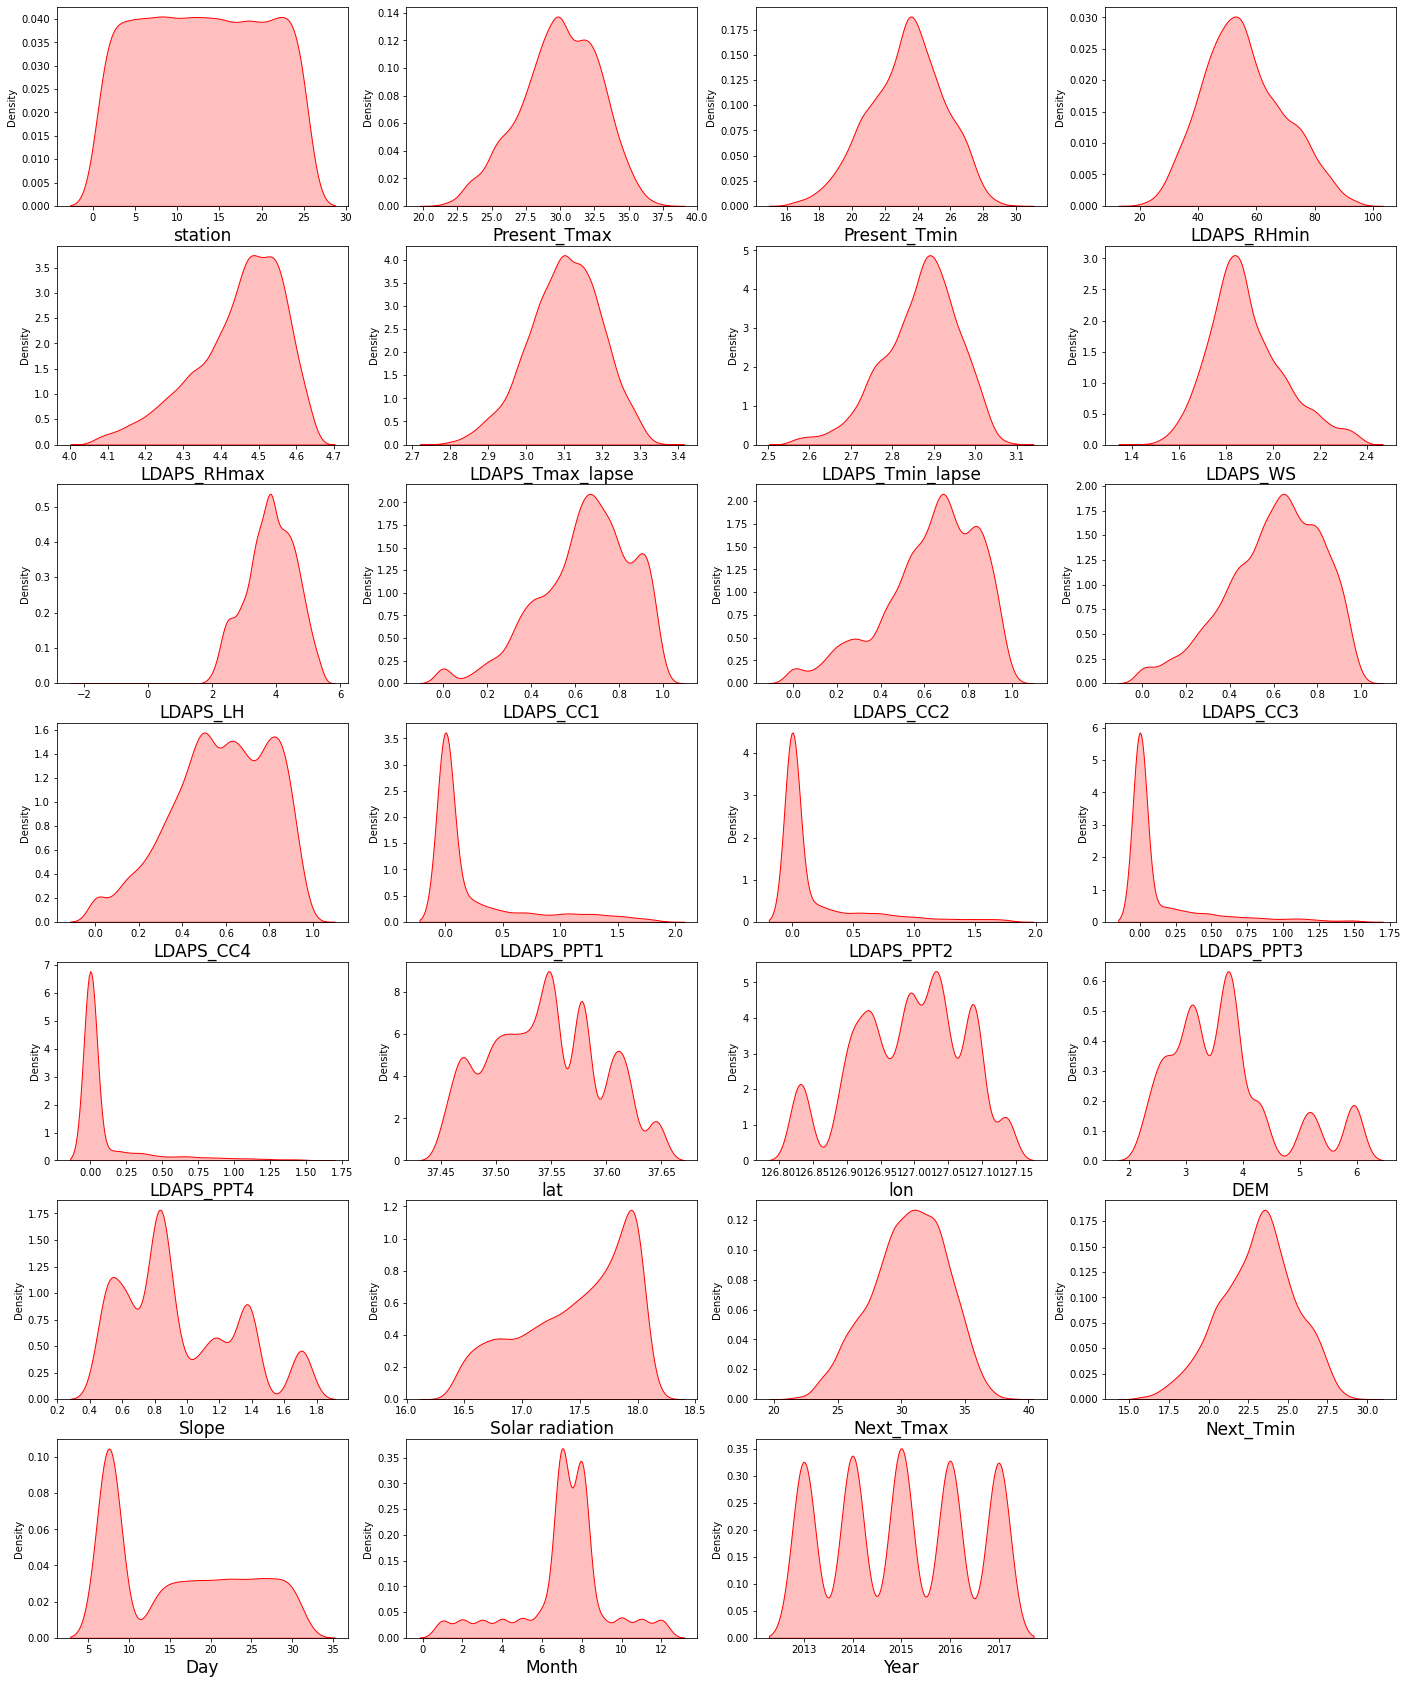

In [147]:
plt.figure(figsize=(24,30), facecolor='white')
plotnumber =1
for column in fore_cast_data_zero:
    if plotnumber<=28:
        ax= plt.subplot(7,4,plotnumber)
        sns.distplot(fore_cast_data_zero[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=17)
    plotnumber+=1
plt.show()

# Checking Correlation

Checking Correlation
Now lets look at the correlation between all the numerical variables. We can use the corr() to compute pairwise correlation of columns, excluding NA/null values using pearson correlation coefficient. Then we will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

In [148]:
fore_cast_data_zero.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
station,1.000000,0.109415,0.131990,-0.067896,-0.171250,0.065650,0.101422,0.024801,-0.135430,0.012568,...,-0.240428,-0.122474,-0.291854,-0.130948,-0.029356,0.105998,0.129070,0.006243,0.002157,0.005841
Present_Tmax,0.109415,1.000000,0.612853,-0.152689,-0.287851,0.532490,0.605751,-0.093644,0.112484,-0.268260,...,-0.050437,0.011179,-0.153464,-0.094750,-0.057301,0.586336,0.616823,-0.126580,0.023887,0.103480
Present_Tmin,0.131990,0.612853,1.000000,0.149044,-0.032283,0.434757,0.752572,0.023030,-0.010006,0.109266,...,-0.071076,-0.043552,-0.245731,-0.156085,0.023664,0.446589,0.785270,-0.070077,-0.014016,0.098147
LDAPS_RHmin,-0.067896,-0.152689,0.149044,1.000000,0.547948,-0.553299,0.138576,0.216089,0.009255,0.564858,...,0.088623,-0.094278,0.082040,0.096458,0.255634,-0.429587,0.132451,-0.072098,-0.074639,0.000856
LDAPS_RHmax,-0.171250,-0.287851,-0.032283,0.547948,1.000000,-0.376897,-0.125325,0.074547,0.302534,0.398306,...,0.192614,0.018135,0.171485,0.196892,0.152384,-0.291857,-0.091056,-0.009950,-0.047329,-0.137948
LDAPS_Tmax_lapse,0.065650,0.532490,0.434757,-0.553299,-0.376897,1.000000,0.618101,-0.205896,-0.003407,-0.371330,...,-0.036605,0.101953,-0.144106,-0.122021,0.024460,0.806659,0.547050,-0.135741,-0.010558,0.055935
LDAPS_Tmin_lapse,0.101422,0.605751,0.752572,0.138576,-0.125325,0.618101,1.000000,-0.040767,-0.140480,0.115469,...,-0.087585,-0.028081,-0.177423,-0.163300,0.130773,0.537115,0.866562,-0.146718,-0.019780,0.040057
LDAPS_WS,0.024801,-0.093644,0.023030,0.216089,0.074547,-0.205896,-0.040767,1.000000,-0.047951,0.201064,...,-0.019460,-0.076115,0.138466,0.108460,0.139471,-0.251549,0.000278,-0.054965,-0.083600,-0.128068
LDAPS_LH,-0.135430,0.112484,-0.010006,0.009255,0.302534,-0.003407,-0.140480,-0.047951,1.000000,-0.127595,...,0.089109,0.005139,0.089958,0.090733,-0.034149,0.138172,-0.053230,-0.014197,-0.021035,0.049105
LDAPS_CC1,0.012568,-0.268260,0.109266,0.564858,0.398306,-0.371330,0.115469,0.201064,-0.127595,1.000000,...,-0.019396,-0.016111,-0.028946,-0.032227,0.230309,-0.384369,0.073962,-0.041807,-0.113557,-0.085507


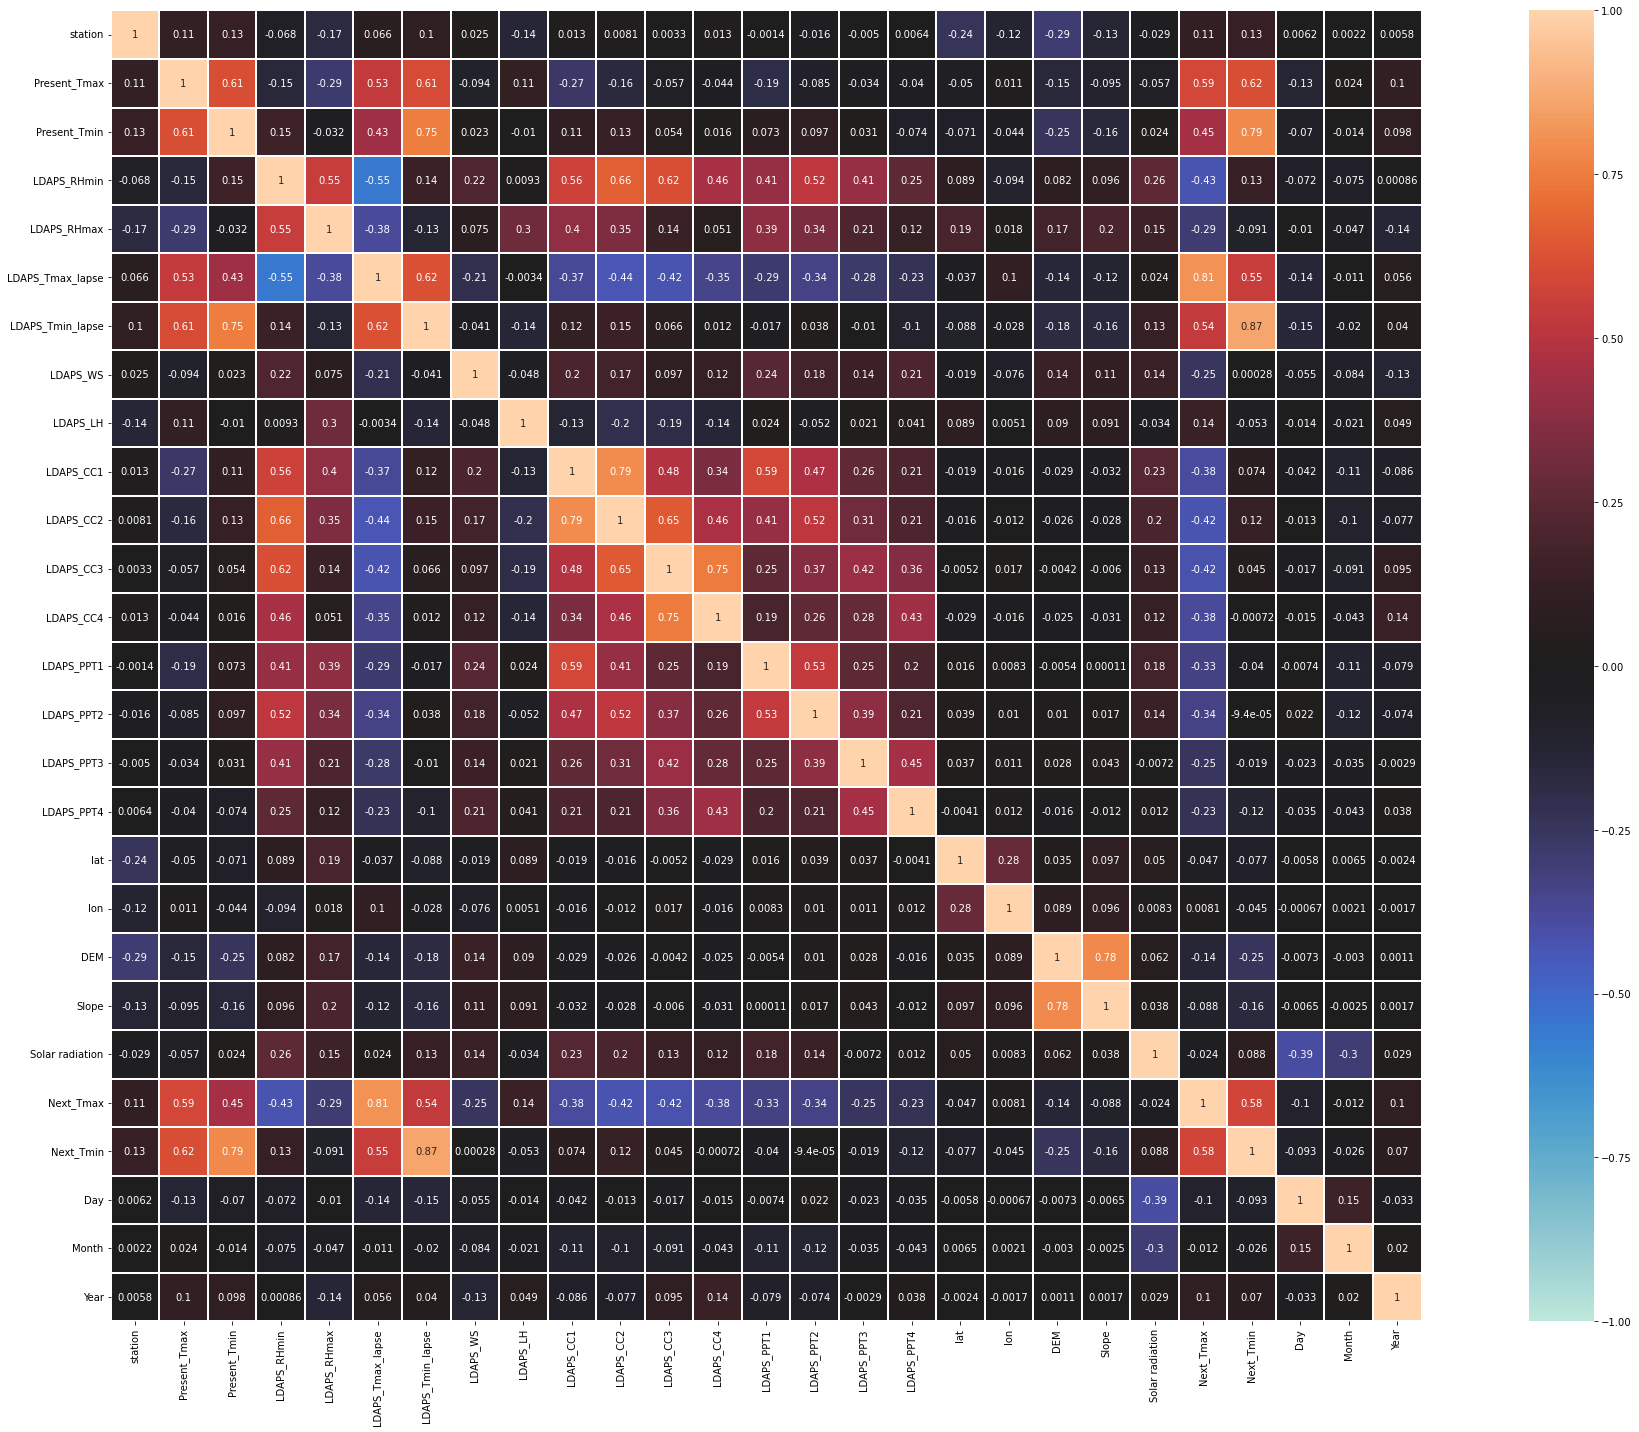

In [149]:
fore_cast_corr=fore_cast_data_zero.corr()
plt.figure(figsize=(30,20))
sns.heatmap(fore_cast_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths= 0.1)
plt.tight_layout()

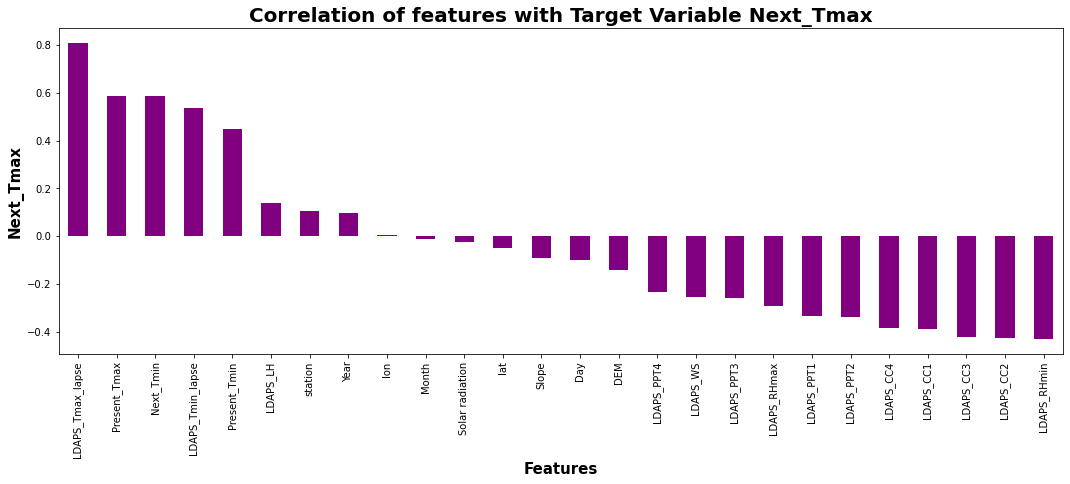

In [150]:
plt.figure(figsize = (18,6))
fore_cast_data_zero.corr()['Next_Tmax'].drop(['Next_Tmax']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmax',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmax',fontsize = 20,fontweight='bold')
plt.show()

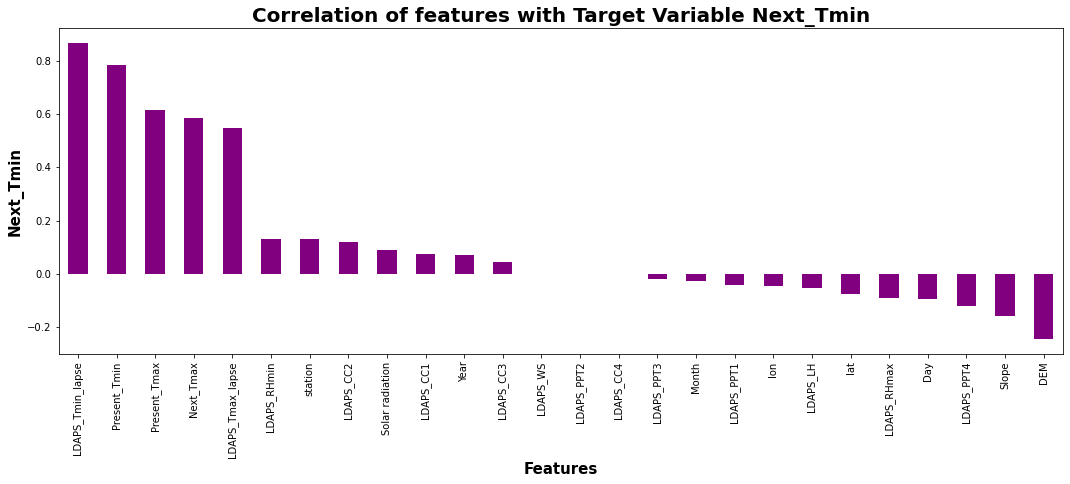

In [151]:
plt.figure(figsize = (18,6))
fore_cast_data_zero.corr()['Next_Tmin'].drop(['Next_Tmin']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmin',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmin',fontsize = 20,fontweight='bold')
plt.show()


# Variance inflation factor

In [152]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(fore_cast_data_zero.values,i)
                 for i in range(len(fore_cast_data_zero.columns))]
vif['features']=fore_cast_data_zero.columns
vif

,VIF values,features
0,5.313203e+00,station
1,3.154030e+02,Present_Tmax
2,3.395921e+02,Present_Tmin
3,1.036373e+02,LDAPS_RHmin
4,3.189334e+03,LDAPS_RHmax
5,8.552583e+03,LDAPS_Tmax_lapse
6,8.512554e+03,LDAPS_Tmin_lapse
7,1.780077e+02,LDAPS_WS
8,3.966193e+01,LDAPS_LH
9,4.316674e+01,LDAPS_CC1


In [171]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
OE = OrdinalEncoder()
for i in fore_cast_data_zero.columns:
        if fore_cast_data_zero[i].dtypes=='float':
            fore_cast_data_zero[i]=OE.fit_transform(fore_cast_data_zero[i].values.reshape(-1,1))
        fore_cast_data_zero   

# Splitting For Minimum

In [154]:
X=fore_cast_data_zero.drop(['Next_Tmax','Next_Tmin'],axis=1)
Y=fore_cast_data_zero['Next_Tmin']

In [155]:

max_r_score=0
r_state=0
for i in range(1,300):
    X_train,X_test,Y_train,Y_test =  train_test_split(X,Y,test_size=.30,random_state=r_state)
    reg=LinearRegression()
    reg.fit( X_train,Y_train)
    y_pred=reg.predict(X_test)
    r2_scr= r2_score(Y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score=r2_scr
        r_state=i
print("max score",max_r_score,"random state",r_state)    
    

max score 0.8101354553754521 random state 2


# Checking null values

In [159]:
fore_cast_data_zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6894 entries, 0 to 7749
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           6894 non-null   float64
 1   Present_Tmax      6894 non-null   float64
 2   Present_Tmin      6894 non-null   float64
 3   LDAPS_RHmin       6894 non-null   float64
 4   LDAPS_RHmax       6894 non-null   float64
 5   LDAPS_Tmax_lapse  6894 non-null   float64
 6   LDAPS_Tmin_lapse  6894 non-null   float64
 7   LDAPS_WS          6894 non-null   float64
 8   LDAPS_LH          6894 non-null   float64
 9   LDAPS_CC1         6894 non-null   float64
 10  LDAPS_CC2         6894 non-null   float64
 11  LDAPS_CC3         6894 non-null   float64
 12  LDAPS_CC4         6894 non-null   float64
 13  LDAPS_PPT1        6894 non-null   float64
 14  LDAPS_PPT2        6894 non-null   float64
 15  LDAPS_PPT3        6894 non-null   float64
 16  LDAPS_PPT4        6894 non-null   float64


# Machine Learning Model Building

Machine Learning Model Building

After creating new features, we can continue the model building process. So we will start with logistic regression model and then move over to more complex models like RandomForest and XGBoost.

We will build the following models in this section.

Logistic Regression 
Decision Tree 
Random Forest 
XGBoost
AdaBoostRegressor
GradientBoostingRegressor
Let’s prepare the data for feeding into the models.

In [214]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
!pip install xgboost
import xgboost as xgb
from xgboost import XGBRegressor

# Model Building,Prediction & Cross Validation Score

In [215]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
adb=AdaBoostRegressor()
xgb=XGBRegressor()
BR = BaggingRegressor()
gradb=GradientBoostingRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')
for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('************************************************************************************************************')




 Error of  RandomForestRegressor() :
Mean absolute error : 6.0274142097631715
Mean squared error : 63.65785181246979
Root Mean Squared Error: 7.97858708121117


 R2 Score :
0.8830384193336781
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


 Error of  ExtraTreesRegressor() :
Mean absolute error : 5.676080231996133
Mean squared error : 57.267089560174
Root Mean Squared Error: 7.567502200870113


 R2 Score :
0.894780468953781
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


 Error of  DecisionTreeRegressor() :
Mean absolute error : 8.768487191880135
Mean squared error : 141.58144030932817
Root Mean Squared Error: 11.89879995248799


 R2 Score :
0.7398657262205995
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


 Error of  AdaBoostRegressor() :
Mean absolute error : 8.860433158040058
Mean squared error : 119.3829534

# Hyper Parameter Tuning : GridSearchCV

In [216]:
from sklearn.model_selection import GridSearchCV
parameter = {'n_estimators':[200,400,500,600],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'eta' : [0.001, 0.01, 0.1] }

In [217]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 1/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=-6.736 total time=   0.5s
[CV 2/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 2/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=-6.252 total time=   0.4s
[CV 3/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 3/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=-6.246 total time=   0.5s
[CV 4/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 4/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=-6.613 total time=   0.4s
[CV 5/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=20

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
   

In [218]:
GCV.best_params_

{'booster': 'dart',
 'eta': 0.1,
 'gamma': 0.1,
 'max_depth': 4,
 'n_estimators': 600}

# Final Model

In [221]:
Final_mod = XGBRegressor(booster= 'dart',eta= 0.1,gamma= 0.1,max_depth=4,n_estimators= 600)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 4.782382812057502
Mean squared error : 40.66449675351762
Root Mean Squared Error: 6.376872019534155


 R2 Score of Final Model :
0.9252851976327569




# Saving model for minimum

In [223]:
import joblib
joblib.dump(Final_mod,'Tmin_Forecast.pkl')

['Tmin_Forecast.pkl']

# Splitting for Maximum

In [224]:
X=fore_cast_data_zero.drop(['Next_Tmax','Next_Tmin'],axis=1)
Y=fore_cast_data_zero['Next_Tmax']

In [225]:

max_r_score=0
r_state=0
for i in range(1,300):
    X_train,X_test,Y_train,Y_test =  train_test_split(X,Y,test_size=.30,random_state=r_state)
    reg=LinearRegression()
    reg.fit( X_train,Y_train)
    y_pred=reg.predict(X_test)
    r2_scr= r2_score(Y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score=r2_scr
        r_state=i
print("max score",max_r_score,"random state",r_state)   

max score 0.7393534735412324 random state 2


In [226]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
adb=AdaBoostRegressor()
xgb=XGBRegressor()
BR = BaggingRegressor()
gradb=GradientBoostingRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')
for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('************************************************************************************************************')




 Error of  RandomForestRegressor() :
Mean absolute error : 7.539144514258096
Mean squared error : 104.5632643305945
Root Mean Squared Error: 10.225618041497272


 R2 Score :
0.8786176751039068
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


 Error of  ExtraTreesRegressor() :
Mean absolute error : 6.7295456742387625
Mean squared error : 83.61126181730305
Root Mean Squared Error: 9.143919390354611


 R2 Score :
0.9029398191434361
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


 Error of  DecisionTreeRegressor() :
Mean absolute error : 10.904301594973417
Mean squared error : 232.72063798936685
Root Mean Squared Error: 15.25518397101021


 R2 Score :
0.7298461149688285
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


 Error of  AdaBoostRegressor() :
Mean absolute error : 11.975124745949838
Mean squared error : 222.

# Hyper Parameter Tuning : GridSearchCV

In [227]:
from sklearn.model_selection import GridSearchCV
parameter = {'n_estimators':[200,400,500,600],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'eta' : [0.001, 0.01, 0.1] }

In [228]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 1/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=-6.174 total time=   0.5s
[CV 2/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 2/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=-5.649 total time=   0.5s
[CV 3/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 3/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=-5.781 total time=   0.5s
[CV 4/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 4/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=-5.555 total time=   0.5s
[CV 5/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=20

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
   

# Final Model

In [229]:
Final_mod = XGBRegressor(booster= 'dart',eta= 0.1,gamma= 0.1,max_depth=4,n_estimators= 600)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 6.422123236031622
Mean squared error : 73.9413554820297
Root Mean Squared Error: 8.598915948073321


 R2 Score of Final Model :
0.9141651354150467




# Saving model for maximum

In [230]:
import joblib
joblib.dump(Final_mod,'Tmax_Forecast.pkl')

['Tmax_Forecast.pkl']

Here both models are made after analysing various parameters using various techniques.more methods may be used s per the requirement and accuracy level we want to attain